Project 2. SARS-CoV

You are in charge of a public health office in a large metropolitan area. There’s currently a COVID-19 outbreak, and due to recent budget cuts, you’ve also been appointed as the new bioinformatics expert (congratulations on the promotion!). Your responsibilities now include developing a pipeline to analyze NGS sequencing data for genome assembly, mutation detection, and lineage identification of sequenced samples.

You have two genomes to work with, and your pipeline should be capable of identifying mutations in both.

To achieve full credit (100%), submit the following deliverables:

1) Two tables (DataFrames) listing mutations for each genome.

2) A third table showing mutations shared between both genomes.

3) A simple chart (using any of the chart types introduced in the previous module) that visualizes an aspect of the data.

In [ ]:
#download genomes
!gdown 1-2h_NXGEvUIcSgtQnpeRy3BN8QKmbARf
!gdown 1-1zFQh9lo7O1Fe6dR6abgwqBZlu4TBB-

!gdown 1-3y7YBrnJmpwdxTqimDGewWpTIkzlWei
!gdown 1-2jBX4sV28m7FoauSMH2Tik65h4m72ig

Downloading...
From (original): https://drive.google.com/uc?id=1-2h_NXGEvUIcSgtQnpeRy3BN8QKmbARf
From (redirected): https://drive.google.com/uc?id=1-2h_NXGEvUIcSgtQnpeRy3BN8QKmbARf&confirm=t&uuid=d9edfd66-1ccf-4c39-b6de-bebf7bdc3d52
To: /content/SARS.R2.fastq
100% 154M/154M [00:02<00:00, 71.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-1zFQh9lo7O1Fe6dR6abgwqBZlu4TBB-
From (redirected): https://drive.google.com/uc?id=1-1zFQh9lo7O1Fe6dR6abgwqBZlu4TBB-&confirm=t&uuid=8e3aa078-4a50-4222-a750-cf6685faa7a2
To: /content/SARS.R1.fastq
100% 154M/154M [00:01<00:00, 135MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-3y7YBrnJmpwdxTqimDGewWpTIkzlWei
From (redirected): https://drive.google.com/uc?id=1-3y7YBrnJmpwdxTqimDGewWpTIkzlWei&confirm=t&uuid=6e28d4ba-1248-4fc8-9592-5566d86a977c
To: /content/SARS-LONG-EDT.R2.fastq
100% 189M/189M [00:01<00:00, 116MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-2jBX4sV28m7FoauSMH2Tik65h4m72ig

In [ ]:
#wuhan reference genome
!gdown 1yTOH-9w0RbcBhwetNWzYxFXENtiyPlzW

Downloading...
From: https://drive.google.com/uc?id=1yTOH-9w0RbcBhwetNWzYxFXENtiyPlzW
To: /content/WuhanRef.fasta
100% 30.4k/30.4k [00:00<00:00, 48.7MB/s]


In [ ]:
#install necessary tools
!apt install bcftools
!apt install bwa
!apt install samtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  python3-numpy python3-matplotlib texlive-latex-recommended
The following NEW packages will be installed:
  bcftools libhts3 libhtscodecs2
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,140 kB of archives.
After this operation, 3,448 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 bcftools amd64 1.13-1 [697 kB]
Fetched 1,140 kB in 1s (1,223 kB/s)
Selecting previously unselected package libhtscodecs2:amd64.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../libhtscodecs2_1.

In [ ]:
#use bwa to index reference gneome
!bwa index -p Wuhan WuhanRef.fasta

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.01 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -p Wuhan WuhanRef.fasta
[main] Real time: 0.060 sec; CPU: 0.016 sec


In [ ]:
#use bwa to align wuhan and sample genomes and into a sam file
!bwa mem Wuhan SARS.R1.fastq SARS.R2.fastq > SARS1.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 131580 sequences (10000080 bp)...
[M::process] read 131580 sequences (10000080 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (83, 63701, 238, 79)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (211, 487, 4761)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 13861)
[M::mem_pestat] mean and std.dev: (2426.69, 2926.00)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 18411)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (173, 242, 304)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 566)
[M::mem_pestat] mean and std.dev: (239.65, 94.08)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 697)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75)

In [ ]:
!bwa mem Wuhan SARS-LONG-EDT.R1.fastq SARS-LONG-EDT.R2.fastq > SARS2.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 39842 sequences (10000342 bp)...
[M::process] read 39842 sequences (10000342 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (2, 19855, 0, 1)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (379, 385, 403)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (331, 451)
[M::mem_pestat] mean and std.dev: (388.00, 10.96)
[M::mem_pestat] low and high boundaries for proper pairs: (307, 475)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 39842 reads in 2.957 CPU sec, 2.873 real sec
[M::process] read 39842 sequences (10000342 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (4, 19848, 0, 5)
[M::mem_pestat] skip orientation 

In [ ]:
#use sam tools to convert same file into sorted file
!samtools view -bS -q 12 SARS1.sam | samtools sort -o SARS1.sam.sorted

In [ ]:
!samtools view -bS -q 12 SARS2.sam | samtools sort -o SARS2.sam.sorted

In [ ]:
#sorting the variants from the reads, using the Wuhan reference genome
!bcftools mpileup -f WuhanRef.fasta --max-depth  2000 SARS1.sam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o SARS1.Variants.vcf.gz

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 2000


In [ ]:
!bcftools mpileup -f WuhanRef.fasta --max-depth  2000 SARS2.sam.sorted  | bcftools call --multiallelic-caller --variants-only --ploidy 1  -mv -Oz -o SARS2.Variants.vcf.gz

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 2000


In [ ]:
#gzip opens the VCF files
!gzip -df SARS1.Variants.vcf.gz
!gzip -df SARS2.Variants.vcf.gz

In [ ]:
!cat SARS1.Variants.vcf
!cat SARS2.Variants.vcf

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##bcftoolsVersion=1.13+htslib-1.13+ds
##bcftoolsCommand=mpileup -f WuhanRef.fasta --max-depth 2000 SARS1.sam.sorted
##reference=file://WuhanRef.fasta
##contig=<ID=NC_045512.2,length=29903>
##ALT=<ID=*,Description="Represents allele(s) other than observed.">
##INFO=<ID=INDEL,Number=0,Type=Flag,Description="Indicates that the variant is an INDEL.">
##INFO=<ID=IDV,Number=1,Type=Integer,Description="Maximum number of raw reads supporting an indel">
##INFO=<ID=IMF,Number=1,Type=Float,Description="Maximum fraction of raw reads supporting an indel">
##INFO=<ID=DP,Number=1,Type=Integer,Description="Raw read depth">
##INFO=<ID=VDB,Number=1,Type=Float,Description="Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)",Version="3">
##INFO=<ID=RPBZ,Number=1,Type=Float,Description="Mann-Whitney U-z test of Read Position Bias (closer to 0 is better)">
##INFO=<ID=MQBZ,Number=1,Type=Float,De

In [ ]:
#install cyvcf2 to help read vcf files


In [ ]:
!pip install cyvcf2
vcf_path_1 = 'SARS1.Variants.vcf'
import cyvcf2
vcf_reader_1 = cyvcf2.VCF(vcf_path_1)

with open('output1.tsv', 'w') as file:
    for variant in vcf_reader_1:
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        file.write(data_string)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
vcf_path_2 = 'SARS2.Variants.vcf'
import cyvcf2
vcf_reader_2 = cyvcf2.VCF(vcf_path_2)

with open('output2.tsv', 'w') as file:
    for variant in vcf_reader_2:
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        file.write(data_string)

In [ ]:
#use pandas to make dataframe for each genome
import pandas
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'GENOTYPE']
SARS1_df = pandas.read_csv("output1.tsv", delimiter = "\t", header=None, names=columns)
SARS1_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,NC_045512.2,21,NaN,C,T,54.414600,NaN,3
1,NC_045512.2,241,NaN,C,T,228.427994,NaN,3
2,NC_045512.2,1387,NaN,C,T,225.421997,NaN,3
3,NC_045512.2,2832,NaN,A,G,228.425995,NaN,3
4,NC_045512.2,3037,NaN,C,T,225.417007,NaN,3
5,NC_045512.2,5386,NaN,T,G,228.425995,NaN,3
6,NC_045512.2,8393,NaN,G,A,225.417007,NaN,3
7,NC_045512.2,10029,NaN,C,T,225.425995,NaN,3
8,NC_045512.2,10449,NaN,C,A,201.427002,NaN,3
9,NC_045512.2,11291,NaN,G,A,35.133900,NaN,3


In [ ]:
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'GENOTYPE']
SARS2_df = pandas.read_csv("output2.tsv", delimiter = "\t", header=None, names=columns)
SARS2_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,NC_045512.2,241,NaN,C,T,228.436005,NaN,3
1,NC_045512.2,3037,NaN,C,T,225.417007,NaN,3
2,NC_045512.2,11842,NaN,G,A,225.421997,NaN,3
3,NC_045512.2,12759,NaN,A,G,225.421997,NaN,3
4,NC_045512.2,14408,NaN,C,T,228.427002,NaN,3
5,NC_045512.2,18292,NaN,G,T,225.425995,NaN,3
6,NC_045512.2,20268,NaN,A,G,225.425995,NaN,3
7,NC_045512.2,23403,NaN,A,G,228.432999,NaN,3
8,NC_045512.2,24978,NaN,A,T,5.756770,NaN,3
9,NC_045512.2,27813,NaN,C,T,228.425995,NaN,3


In [ ]:
import pandas as pd

# combined the two dataframes on the 'Position' column to compare mutations at the same positions
combined_df = pd.merge(SARS1_df, SARS2_df, on= 'POS', suffixes=('_1', '_2'))

# Find positions where mutations are the same in both datasets
same_mutations = combined_df[combined_df['REF_1'] == combined_df['REF_2']]
same_mutations = same_mutations[same_mutations['ALT_1'] == same_mutations['ALT_2']]

# Output results
print("Same Mutations:")
print(same_mutations[['POS', 'REF_1', 'ALT_1', 'REF_2', 'ALT_2']])

Same Mutations:
     POS REF_1 ALT_1 REF_2 ALT_2
0    241     C     T     C     T
1   3037     C     T     C     T
2  14408     C     T     C     T
3  23403     A     G     A     G


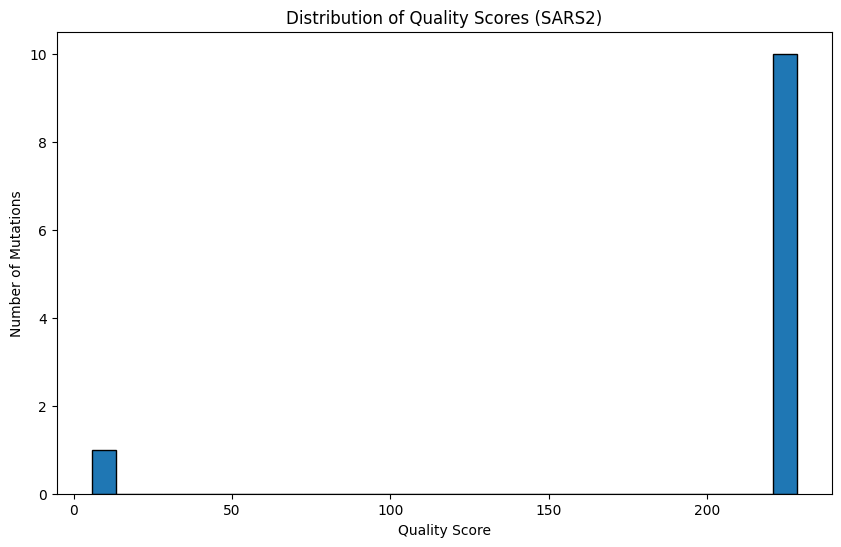

In [ ]:
#visualization showing distribution of quality scores in SARS2 dataFrame
plt.figure(figsize=(10, 6))
plt.hist(SARS2_df['QUAL'], bins=30, edgecolor='black')
plt.title('Distribution of Quality Scores (SARS2)')
plt.xlabel('Quality Score')
plt.ylabel('Number of Mutations')
plt.savefig('SARS2_quality_score_distribution.png')
plt.show()

